In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# with open('D:/6409.csv', newline='',encoding='utf-16') as csvfile:
a = pd.read_csv('D:/6409.csv',encoding='mbcs')

In [3]:
a

,年月日,收盤價(元),進場,預測結果
0,2018/01/02,483.2199,3,3
1,2018/01/03,484.1491,3,3
2,2018/01/04,491.5833,2,3
3,2018/01/05,501.8053,2,3
4,2018/01/08,497.1589,2,3
...,...,...,...,...
177,2018/09/21,511.0980,2,2
178,2018/09/25,512.9565,2,2
179,2018/09/26,509.2394,2,2
180,2018/09/27,508.3101,2,2


In [4]:
a.columns=['date','adjusted_price','excepted_results','results']

In [5]:
a

,date,adjusted_price,excepted_results,results
0,2018/01/02,483.2199,3,3
1,2018/01/03,484.1491,3,3
2,2018/01/04,491.5833,2,3
3,2018/01/05,501.8053,2,3
4,2018/01/08,497.1589,2,3
...,...,...,...,...
177,2018/09/21,511.0980,2,2
178,2018/09/25,512.9565,2,2
179,2018/09/26,509.2394,2,2
180,2018/09/27,508.3101,2,2


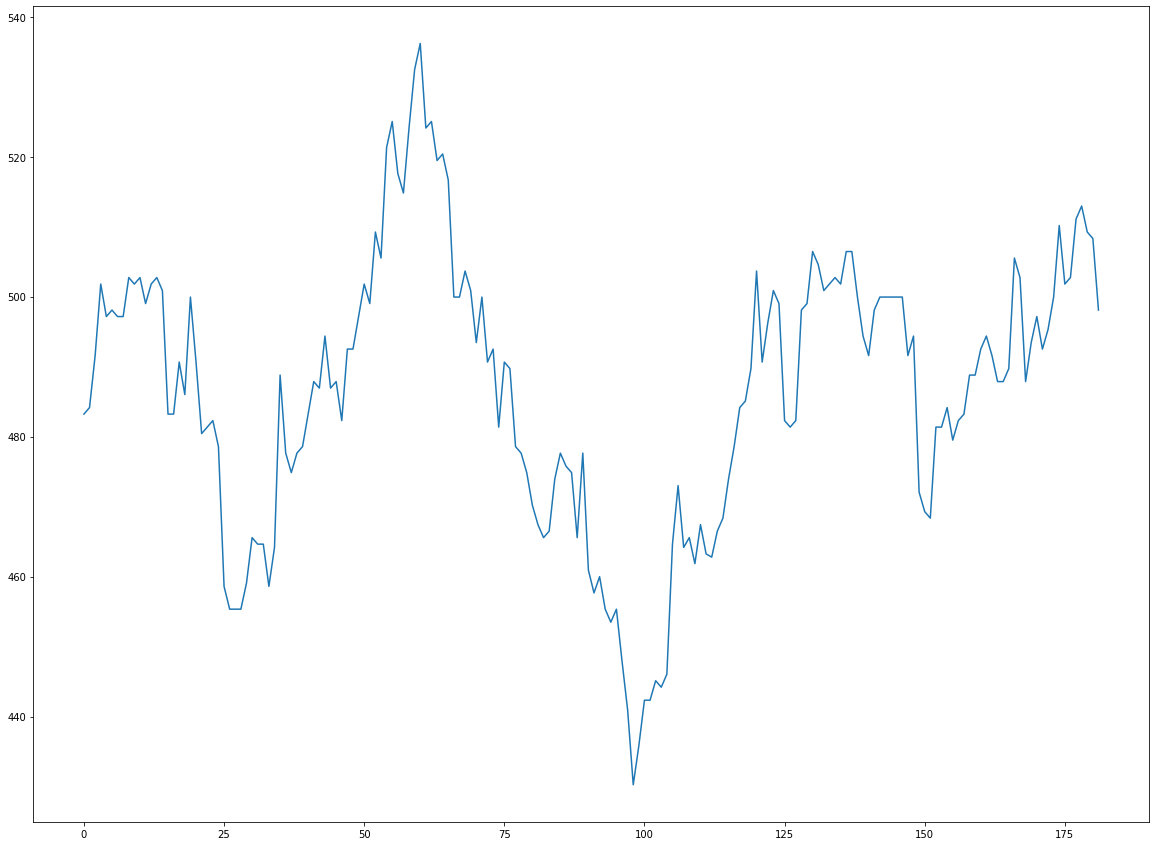

In [6]:
a.adjusted_price.plot(figsize=(20,15))

In [7]:
sma_short = pd.DataFrame()
sma_short['date'] = a['date']
sma_short['adjclose'] = a['adjusted_price'].rolling(window=5).mean()
sma_short.loc[3:8]

,date,adjclose
3,2018/01/05,NaN
4,2018/01/08,491.58330
5,2018/01/09,494.55696
6,2018/01/10,497.15892
7,2018/01/11,498.27404
8,2018/01/12,498.45988


In [8]:
sma_long = pd.DataFrame()
sma_long['date'] = a['date']
sma_long['adjclose'] = a['adjusted_price'].rolling(window=20).mean()
sma_long.loc[18:30]

,date,adjclose
18,2018/01/26,NaN
19,2018/01/29,495.253915
20,2018/01/30,495.625620
21,2018/01/31,495.439770
22,2018/02/01,494.928670
23,2018/02/02,493.952935
24,2018/02/05,493.023665
25,2018/02/06,491.048970
26,2018/02/07,488.958115
27,2018/02/08,486.867260


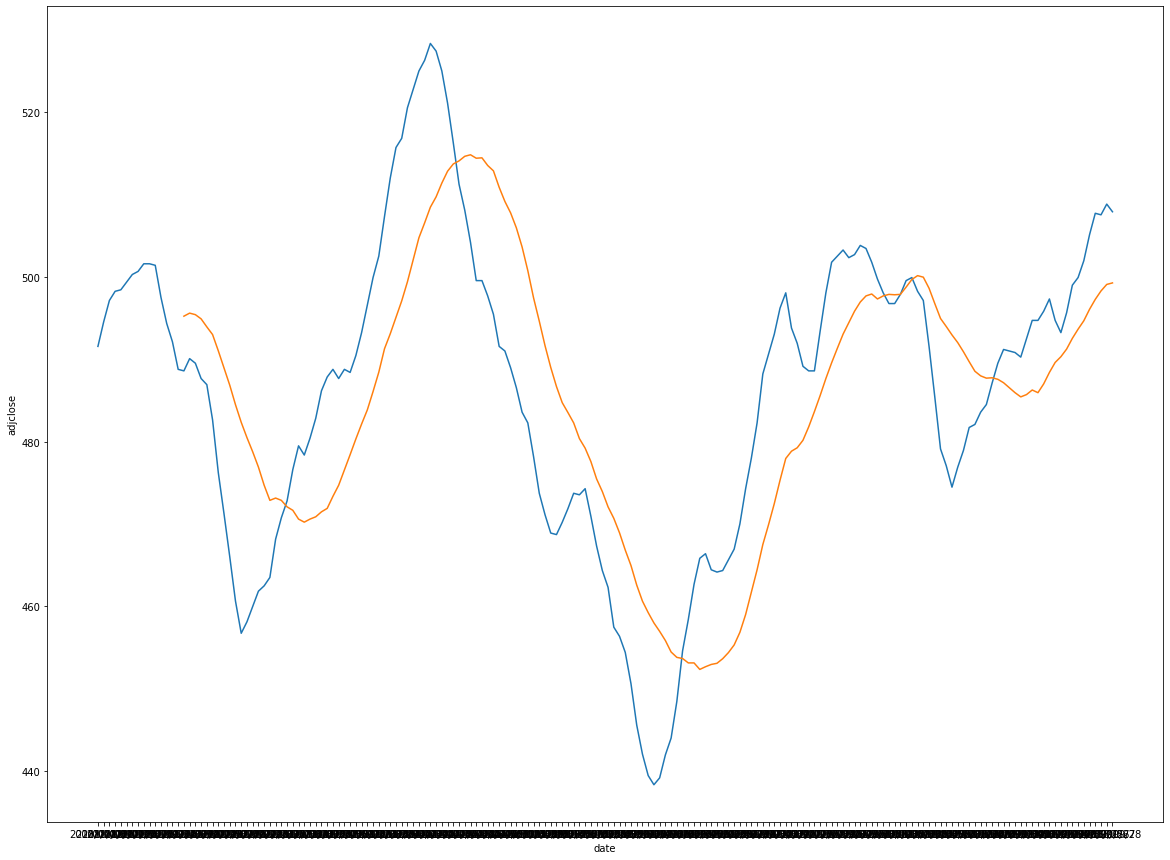

In [9]:
plt.figure(figsize=(20,15))
sns.lineplot(x='date', y='adjclose', data=sma_short)
sns.lineplot(x='date', y='adjclose', data=sma_long)

In [10]:
excepted_results = pd.DataFrame()
excepted_results['date'] = a['date']
excepted_results['adjusted_price']=a['adjusted_price']
excepted_results['excepted_results']=a['excepted_results']

In [11]:
excepted_results

,date,adjusted_price,excepted_results
0,2018/01/02,483.2199,3
1,2018/01/03,484.1491,3
2,2018/01/04,491.5833,2
3,2018/01/05,501.8053,2
4,2018/01/08,497.1589,2
...,...,...,...
177,2018/09/21,511.0980,2
178,2018/09/25,512.9565,2
179,2018/09/26,509.2394,2
180,2018/09/27,508.3101,2


In [12]:
excepted_results.iloc[1,2]

3

In [13]:
buy=[]
sell=[]
stay=[]
for value in excepted_results["excepted_results"]:
    if value==1:
        buy.append(1)
        sell.append(0)
        stay.append(0)
    elif value==2:
        buy.append(0)
        sell.append(1)
        stay.append(0)
    else:
        buy.append(0)
        sell.append(0)
        stay.append(1)

In [14]:
excepted_results["buy"] = buy
excepted_results["sell"] = sell
excepted_results["stay"] = stay

In [27]:
excepted_results

,date,adjusted_price,excepted_results,buy,sell,stay
0,2018/01/02,483.2199,3,0,0,1
1,2018/01/03,484.1491,3,0,0,1
2,2018/01/04,491.5833,2,0,1,0
3,2018/01/05,501.8053,2,0,1,0
4,2018/01/08,497.1589,2,0,1,0
...,...,...,...,...,...,...
177,2018/09/21,511.0980,2,0,1,0
178,2018/09/25,512.9565,2,0,1,0
179,2018/09/26,509.2394,2,0,1,0
180,2018/09/27,508.3101,2,0,1,0


In [23]:
signal_buy=excepted_results[excepted_results['buy']==1]({'date': excepted_results['date'], 'date': excepted_results['date']})
signal_buy

,date,adjusted_price,excepted_results,buy,sell,stay
15,2018/01/23,483.2199,1,1,0,0
16,2018/01/24,483.2199,1,1,0,0
17,2018/01/25,490.6540,1,1,0,0
18,2018/01/26,486.0077,1,1,0,0
21,2018/01/31,480.4321,1,1,0,0
22,2018/02/01,481.3613,1,1,0,0
23,2018/02/02,482.2906,1,1,0,0
24,2018/02/05,478.5735,1,1,0,0
25,2018/02/06,458.5943,1,1,0,0
26,2018/02/07,455.3418,1,1,0,0


In [31]:
signal_sell=excepted_results[excepted_results['sell']==1]
signal_sell

,date,adjusted_price,excepted_results,buy,sell,stay
2,2018/01/04,491.5833,2,0,1,0
3,2018/01/05,501.8053,2,0,1,0
4,2018/01/08,497.1589,2,0,1,0
5,2018/01/09,498.0882,2,0,1,0
6,2018/01/10,497.1589,2,0,1,0
7,2018/01/11,497.1589,2,0,1,0
8,2018/01/12,502.7345,2,0,1,0
9,2018/01/15,501.8053,2,0,1,0
10,2018/01/16,502.7345,2,0,1,0
11,2018/01/17,499.0175,2,0,1,0


In [29]:
import numpy as np

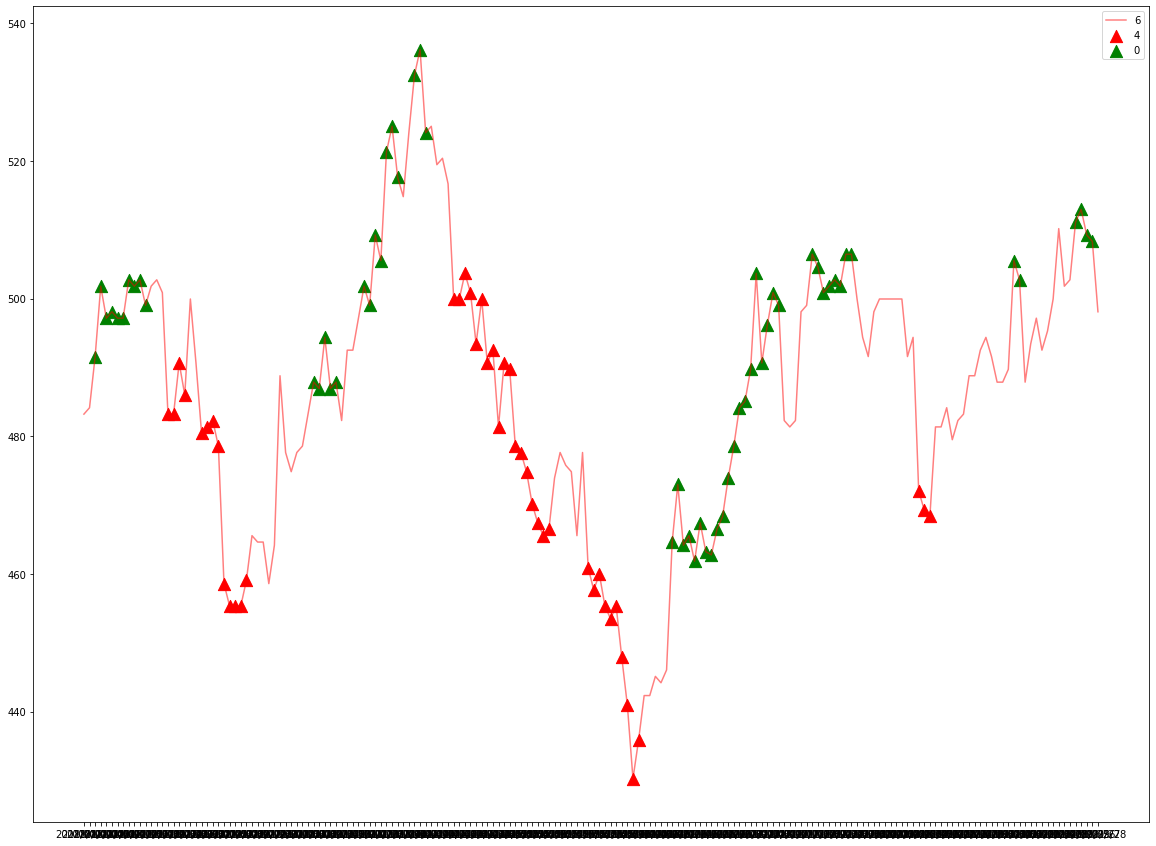

In [36]:
plt.figure(figsize=(20,15))
plt.plot(excepted_results['date'], excepted_results['adjusted_price'], color='r', alpha=0.5, label='日調整股價')
plt.scatter(signal_buy['date'], signal_buy['adjusted_price'], c='r', marker='^', s=150)
plt.scatter(signal_sell['date'], signal_sell['adjusted_price'], c='g', marker='^', s=150)

plt.legend('6409旭準')
plt.savefig('6409.pdf')

In [41]:
b = pd.read_csv('D:/6409旭準)620.csv',encoding='mbcs')

In [42]:
b

,報酬率1,報酬率2
0,-0.073777,-0.086074
1,0.025780,0.030076
2,0.806764,0.956632
3,1.813103,2.218829
4,1.365938,1.646895
...,...,...
177,7.292356,4.259913
178,7.302692,4.461510
179,7.260046,4.054459
180,7.260046,3.953654


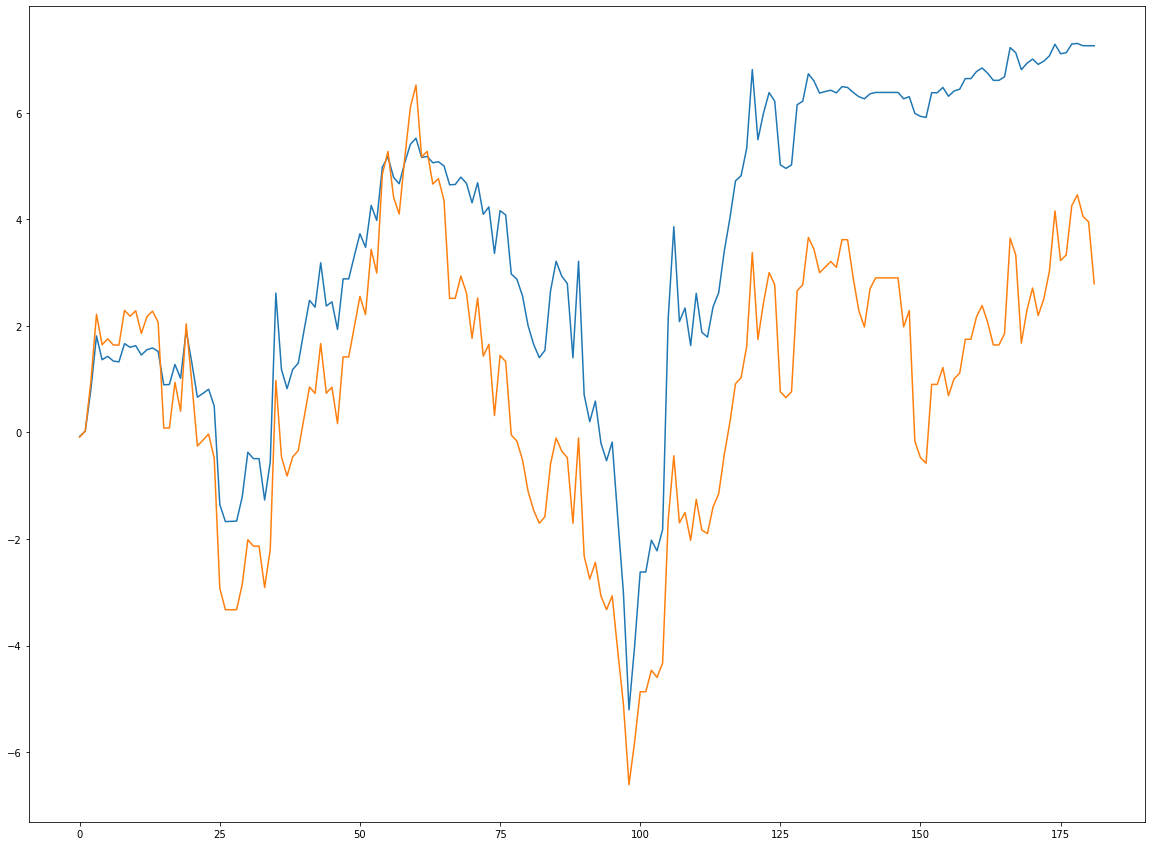

In [51]:
plt.figure(figsize=(20,15))
plt.plot(b)